In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from noteify.core.datasets import (MusicNetDataset, MusicNetDatasetProcessed, MusicAugmentor,
                                   MusicNetSampler, get_musicnet_dataloader)
from noteify.core.utils import plot_audio, plot_roll_info
from noteify.utils import get_rel_pkg_path

In [2]:
data_dir = get_rel_pkg_path("musicnet/")
raw_dataset = MusicNetDataset(data_dir, download=True, train=True, numpy_cache=False)

100%|██████████████████████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 4960.98it/s]

Loading audio


Record ID: 1727
Sampling rate: 16000
Number of samples: 7152954
Note infos: [{'start_sample': 12247.80045351474, 'end_sample': 22650.340136054423, 'instrument': 42, 'note': 60, 'start_beat': 4.5, 'end_beat': 0.5, 'note_value': 'Eighth'}, {'start_sample': 3331.337868480726, 'end_sample': 73362.72108843537, 'instrument': 44, 'note': 41, 'start_beat': 4.0, 'end_beat': 3.5, 'note_value': 'Whole'}, {'start_sample': 3331.337868480726, 'end_sample': 22650.340136054423, 'instrume ...
Number of notes: 6


C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


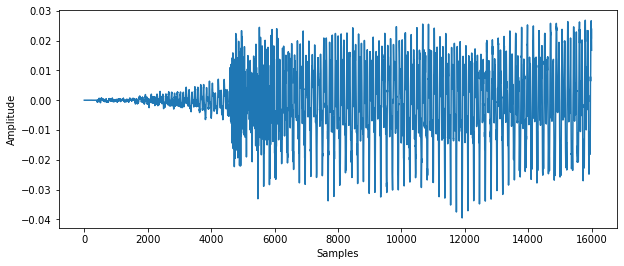

In [3]:
rec_id = raw_dataset.rec_ids[0]
num_samples = raw_dataset.get_record_num_samples(rec_id)
sr = raw_dataset.sample_rate
x, note_infos = raw_dataset.get_record_data(rec_id, 0, sr*1)
print("Record ID:", rec_id)
print("Sampling rate:", sr)
print("Number of samples:", num_samples)
print("Note infos:", str(note_infos)[:400], "...")
print("Number of notes:", len(note_infos))
plot_audio(x)

Took 0.08885693550109863 seconds to load 1 sample


C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


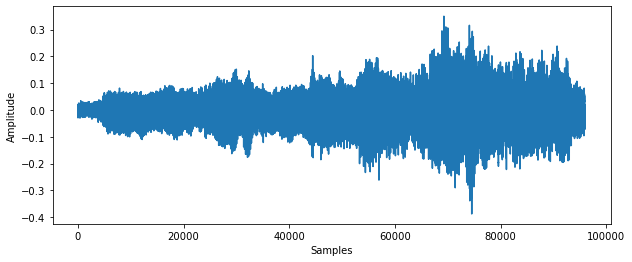

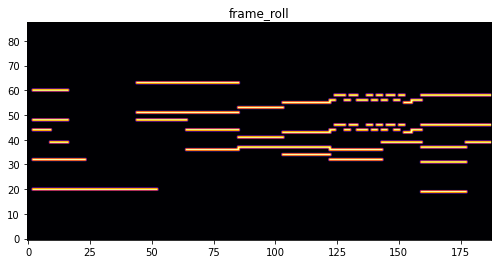

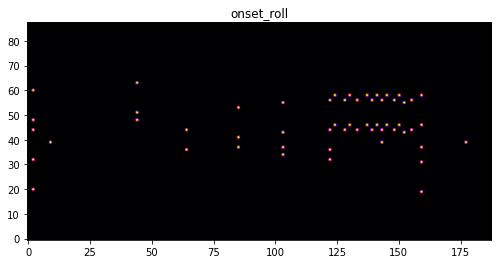

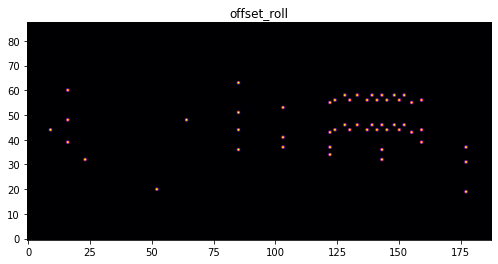

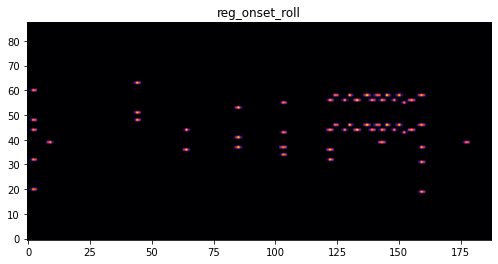

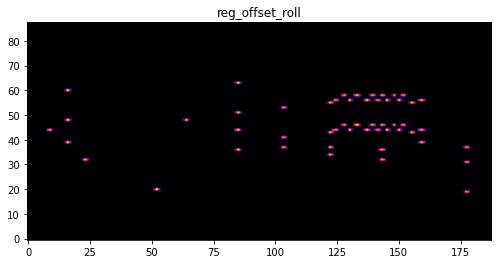

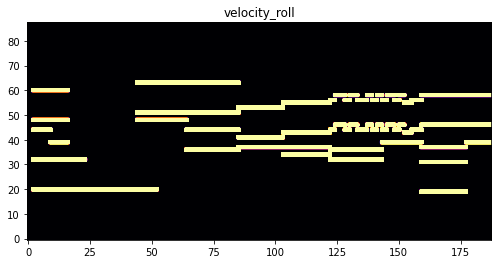

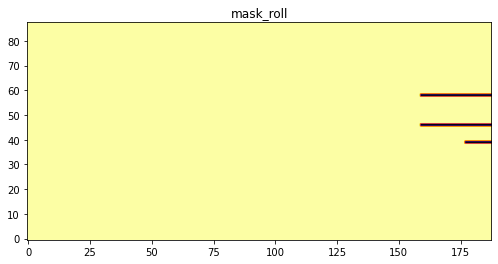

In [4]:
proc_dataset = MusicNetDatasetProcessed(raw_dataset, MusicAugmentor())
start_time = time.time()
x, roll_info = proc_dataset[rec_id, 0]
print("Took {} seconds to load 1 sample".format(time.time() - start_time))
plot_audio(x)
plot_roll_info(roll_info)

In [5]:
batch_size = 1
sampler = MusicNetSampler(proc_dataset, batch_size)
dataloader = get_musicnet_dataloader(proc_dataset, sampler, num_workers=None)

In [6]:
batch = next(iter(dataloader))
print(batch[0].shape, {k: v.shape for k, v in batch[1].items()})

torch.Size([1, 96000]) {'frame_roll': torch.Size([1, 188, 88]), 'onset_roll': torch.Size([1, 188, 88]), 'offset_roll': torch.Size([1, 188, 88]), 'reg_onset_roll': torch.Size([1, 188, 88]), 'reg_offset_roll': torch.Size([1, 188, 88]), 'velocity_roll': torch.Size([1, 188, 88]), 'mask_roll': torch.Size([1, 188, 88])}


In [ ]:
%qtconsole